In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Para gráficos
import seaborn as sns # Para gráficos
import os
import warnings
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats

# Desactivar advertencias
warnings.filterwarnings("ignore")

In [212]:
#Hacemos una distribucion binomial de dos variables --> Esto es un caso discreto
np.random.seed(42)
X = np.random.binomial(n=1,p=0.2,size=100)
Y = np.random.binomial(n=1,p=0.6,size=100)

#Tabla de probs.
tabla_probs = pd.crosstab(X, Y, normalize=True, margins=True, rownames=['Variable X'], colnames=['Variable Y'])
print(tabla_probs)

Variable Y     0     1   All
Variable X                  
0           0.35  0.47  0.82
1           0.06  0.12  0.18
All         0.41  0.59  1.00


<h3> Calculando una Prob. Condicional </h3>

La función de probabilidad condicional de $Y$ respecto a $X$ se define de la siguiente forma: $f_{Y/X}=P(Y=y/X=x)=P(X=x,Y=y)/P(X=x)$

Entonces si queremos hallar la probabildad que ocurra el suceso Y dado que ocurrió el suceso X simplimente calculamos la probabilidad conjunta de dichos suceso sobre la probabilidad del suceso X.

In [213]:
prob_y_x = tabla_probs[1][1] #Esto seria P(Y = 1 ; X = 1)
prob_x = pd.value_counts(X).values[1]

#aplicamos la formula de la prob. condicional
prob_condicionada = prob_y_x / prob_x

prob_condicionada

0.006666666666666666

<h3> Estudiando la correalaccion de variables </h3>

La covarianza y el coeficiente de correlación son medidas que resumen el grado de asociación entre dos variables. Miden la asociación *lineal* entre estas variables. Repasamos las fórmulas muestrales para estimar estas medidas con un caso simulado de variables correlacionadas.

\

**Parámetro:** Covarianza poblacional.

$$Cov(X,Y)=E[(X-\mu_X)(Y-\mu_Y)]=E(XY)-\mu_X\mu_Y$$

**Estadístico:** Covarianza muestral

$$Cov(x,y)=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{n-1}$$



Lo que buscamos en esta seccion es ver como exite una relacion entre variables, y ademas los distintos metodos que hay para esto.

Cov. : 0.5007 **** Corr. : 0.4571


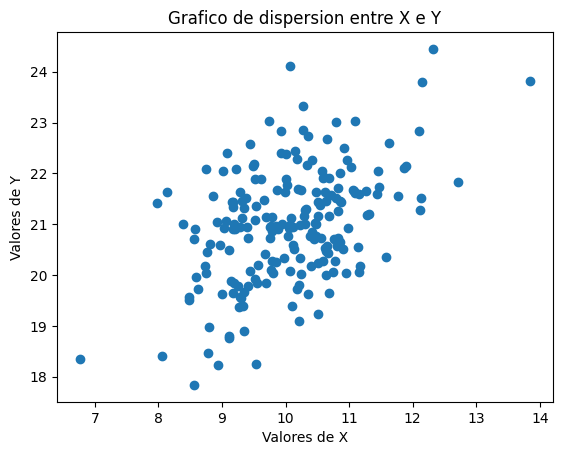

In [214]:
#En este los numeros que suman al principio, lo unico que hacen es mover la media de cada uno de los conjuntos de datos.
#Si aumento el desvio de alguna, poco a poco se perdera 
X = 10 + np.random.normal(loc=0, scale=1, size=200)
Y = 15 +  0.6 * X + np.random.normal(loc=0, scale=1, size=200) 

#Calculo de Covarianza y Correlaccion.
cov = np.cov(X,Y,ddof=1)[0,1]
corr = np.corrcoef(X,Y,ddof=1)[0,1]

print(f"Cov. : {cov:.4f} **** Corr. : {corr:.4f}")

plt.scatter(X,Y)
plt.title("Grafico de dispersion entre X e Y")
plt.xlabel("Valores de X")
plt.ylabel("Valores de Y")
plt.show()

<h3> Grafico de distribucion conjunta </h3>
Vamos a crear graficos 3D.

In [215]:
#Creamos las medias y varianzas a usar
mean = [0, 0]
cov = [[1, 0.6], [0.6, 1]]

In [216]:
#Creamos la lista de numeros
x = np.linspace(1, 3, 3) 
y = np.linspace(4, 7, 3)

#Crea una gilla, donde cada punto de x es asignado a un punto de y. Todavia no se crea como tal una "matriz conjunta"
X, Y = np.meshgrid(x, y)

#Z representa la matriz conjunta, donde se crea una cantidad de dimensiones donde CADA PUNTO DE X esta asignado a CADA PUNTO DE Y.
Z = np.dstack((X,Y))

print(X)
print("\n")
print(Y)
print("\n")
print(Z) 

[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


[[4.  4.  4. ]
 [5.5 5.5 5.5]
 [7.  7.  7. ]]


[[[1.  4. ]
  [2.  4. ]
  [3.  4. ]]

 [[1.  5.5]
  [2.  5.5]
  [3.  5.5]]

 [[1.  7. ]
  [2.  7. ]
  [3.  7. ]]]


Vamos a hacer lo mismo pero para distribuciones normales

Text(0.5, 0, 'Densidad')

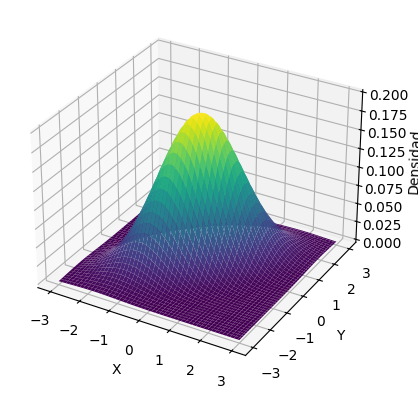

In [217]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

rv = stats.multivariate_normal(mean, cov)
Z = rv.pdf(pos) #--> Creamos la funcion de densidad de las V.A's

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y , Z, cmap='viridis', edgecolor='none')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Densidad')